In [1]:
import pandas as pd
import os
import  matplotlib.pyplot as plt
import numpy as np

In [9]:
cwd=os.getcwd()+"//"
filepath = cwd+"//data//"
fileName="data_sample.csv"
n=6
savePlots=cwd+"//plots//"
saveResults=cwd+"//results//"

In [13]:
'''
    reads the input file and removes rows with NA
'''
def readData(fileName):
    df=pd.read_csv(filepath+fileName)
    df=df.dropna()
    print("\n\t 1. Input file shape:",df.shape)
    df.head()
    return df

In [14]:
def stat(df1):
    print("\n\t stat properties of data :\n",df1.describe())

In [15]:
df=readData(fileName)
df.head()


	 1. Input file shape: (106746, 3)


,timeUTC,wind_speed,wind_direction
0,2014-12-19 14:40:00,4.94,138.0
1,2014-12-19 14:50:00,4.78,139.2
2,2014-12-19 15:00:00,4.88,140.6
3,2014-12-19 15:10:00,4.81,139.4
4,2014-12-19 15:20:00,4.76,137.3


In [17]:
'''
    add extra column which separates date and time
'''

df['Dates'] = pd.to_datetime(df['timeUTC']).dt.date
df['Time'] = pd.to_datetime(df['timeUTC']).dt.time
df.to_csv(".//data//data.csv")
df['Dates'].unique()
len(df['Dates'].unique())

742

In [18]:
df["timeUTC"]=pd.to_datetime(df["timeUTC"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106746 entries, 0 to 106748
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timeUTC         106746 non-null  datetime64[ns]
 1   wind_speed      106746 non-null  float64       
 2   wind_direction  106746 non-null  float64       
 3   Dates           106746 non-null  object        
 4   Time            106746 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.9+ MB


In [20]:
df["year"]=df["timeUTC"].dt.year
df["month"]=df["timeUTC"].dt.month
df["day"]=df["timeUTC"].dt.day
df["Time"]=df["timeUTC"].dt.time
df.head()
df.to_csv(".//data//data.csv")

In [21]:
df.groupby([df.year, df.month]).mean()
dfTemp=df[["wind_speed","month","year"]]
dfTemp.groupby([dfTemp.year, dfTemp.month]).mean()

wind_speed
year month            
2014 12       2.757960
2015 1        5.236727
     2        5.987143
     3        5.629601
     4        5.137972
     5        5.193676
     6        5.288808
     7        4.036281
     8        4.217713
     9        4.776363
     10       5.384982
     11       4.472722
     12       5.086093
2016 1        3.042864
     2        4.927739
     3        4.431700
     4        4.500333
     5        4.165777
     6        4.633051
     7        3.967802
     8        4.969498
     9        4.590873
     10       3.967650
     11       4.491417
     12       4.618178

In [22]:
'''
    monthly average of the wind direction
'''

dfTemp=df[["wind_direction","month","year"]]
dfTemp.groupby([dfTemp.year, dfTemp.month]).mean()

wind_direction
year month                
2014 12         198.951513
2015 1          163.313978
     2          196.811086
     3          203.615345
     4          218.516898
     5          184.483490
     6          217.717731
     7          189.710641
     8          212.674888
     9          199.341343
     10         221.729650
     11         191.322014
     12         224.660820
2016 1          177.049429
     2          196.968367
     3          204.251187
     4          186.915417
     5          189.371662
     6          203.648264
     7          217.659386
     8          191.871505
     9          188.299213
     10         170.670632
     11         174.649352
     12         251.494214

In [23]:
'''
    monthly average of the wind direction
'''

dfTemp=df[["wind_direction","month","year"]]
dfTemp.groupby([dfTemp.year, dfTemp.month]).mean()

wind_direction
year month                
2014 12         198.951513
2015 1          163.313978
     2          196.811086
     3          203.615345
     4          218.516898
     5          184.483490
     6          217.717731
     7          189.710641
     8          212.674888
     9          199.341343
     10         221.729650
     11         191.322014
     12         224.660820
2016 1          177.049429
     2          196.968367
     3          204.251187
     4          186.915417
     5          189.371662
     6          203.648264
     7          217.659386
     8          191.871505
     9          188.299213
     10         170.670632
     11         174.649352
     12         251.494214

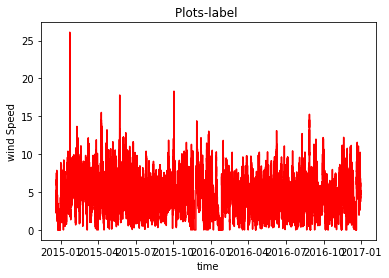

In [24]:
'''
    time vs wind speed
'''
dfTemp=df[["timeUTC","wind_speed","wind_direction"]]
col=dfTemp.columns

plt.figure(1)
plt.title("Plots-label ")
plt.xlabel("time")
plt.ylabel("wind Speed")
plt.plot(dfTemp[col[0]], dfTemp[col[1]], "r-")
#plt.grid(color='0.65', linestyle='-')
plt.savefig("wind time_VS_speed1.png")
plt.show()

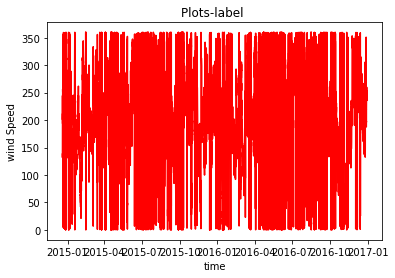

In [25]:
'''
    dialy wind direction
'''
dfTemp=df[["timeUTC","wind_speed","wind_direction"]]
col=dfTemp.columns

plt.figure(1)
#plt.figure(figsize=(200,100))
plt.title("Plots-label ")
plt.xlabel("time")
plt.ylabel("wind Speed")
plt.plot(dfTemp[col[0]], dfTemp[col[2]], "r-")
#plt.grid(color='0.65', linestyle='-')
plt.savefig("time_VS_wind direction.png")
plt.show()

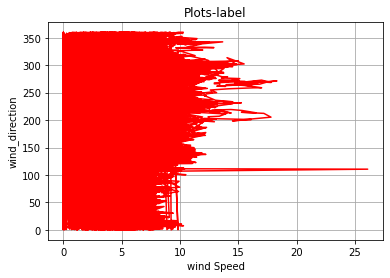

In [26]:
dfTemp=df[["timeUTC","wind_speed","wind_direction"]]
col=dfTemp.columns

plt.figure(1)
#plt.figure(figsize=(200,100))
plt.title("Plots-label")
plt.xlabel("wind Speed")
plt.ylabel("wind_direction")
plt.plot(dfTemp[col[1]], dfTemp[col[2]], "r-")
plt.grid(color='0.65', linestyle='-')
plt.savefig("wind Speed_VS_wind direction.png")
plt.show()

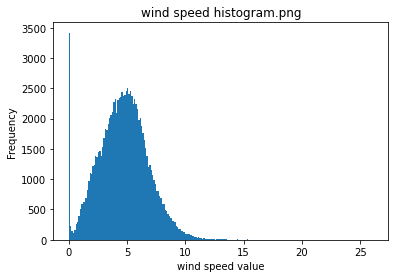

In [28]:
'''
    histogram analysis
'''
col=dfTemp.columns
col
a=np.array(dfTemp[col[1]])
fig = plt.hist(a,bins='auto')
plt.title('wind speed histogram.png')
plt.xlabel("wind speed value")
plt.ylabel("Frequency")
#plt.savefig("abc.png")
plt.savefig("wind speed_VS_time_hist.png")

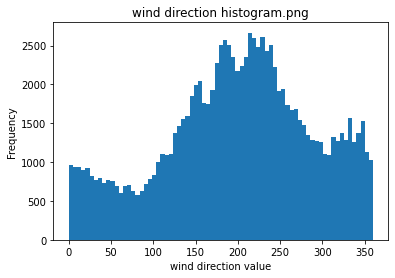

In [29]:
'''
    histogram analysis
'''
col=dfTemp.columns
col
a=np.array(dfTemp[col[2]])
fig = plt.hist(a,bins='auto')
plt.title('wind direction histogram.png')
plt.xlabel("wind direction value")
plt.ylabel("Frequency")
#plt.savefig("abc.png")
plt.savefig("wind direction_VS_hist.png")